# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers.
They collected a sample that summarizes the activities of users during the past few months. 
You are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation:

* spending: Amount spent by the customer per month (in 1000s)
* advance_payments: Amount paid by the customer in advance by cash (in 100s)
* probability_of_full_payment: Probability of payment done in full by the customer to the bank
* current_balance: Balance amount left in the account to make purchases (in 1000s)
* credit_limit: Limit of the amount in credit card (10000s)
* min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
* max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly

Load Data frame

In [283]:
df=pd.read_csv('C:/Users/Dell/Downloads/bank_marketing_part1_Data.csv')

In [284]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


**Observation:**

Data looks good based on top 5 rows in the dataframe.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**Observation:**
* 7 Columns and 210 non-null records.
* there is no missing record based on intial analysis.
* All the variables numeric type

In [286]:
df.shape

(210, 7)

In [287]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

**Obeservation:**
Found no null values.

In [288]:
dups = df.duplicated()
dups.sum()

0

**Obeservation:**
Found no duplicate data.

# Univariate analysis

In [289]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


**Observation**
1. As per the above summary, The data looks good.
2. Mean of spending and advanced payments are almost equal.
3. Mean of other variables are nearly equal.
4. Standard Deviation is high for spending.
5. We can standardise the data for further analysis.

<AxesSubplot:>

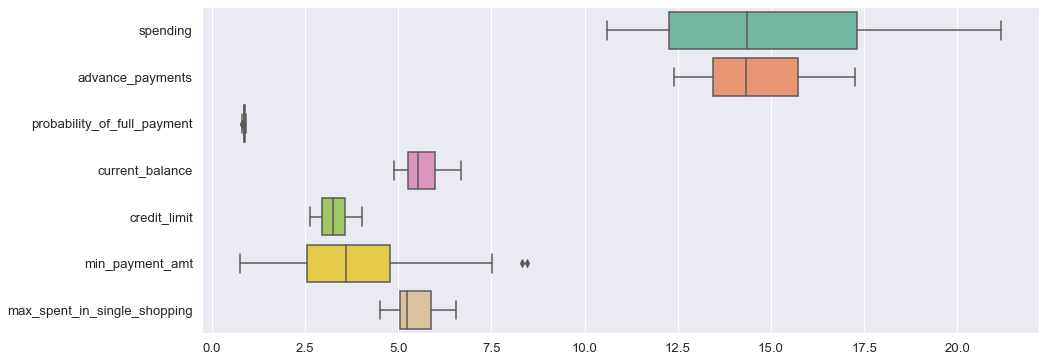

In [290]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, orient="h", palette="Set2")

**From the above graph we can see that, the outlier is for existingprobability_of_full_payment and  min_payment_amt variables.**

**SPENDING VARIABLE:**

From descriptive summary:
* Minimum spending:  10.59
* Maximum spending:  21.18
* Mean value:  14.847523809523818
* Median value(50%):  14.355
* Standard deviation:  2.909699430687361
* Null values:  Not found

In [291]:
from scipy import stats
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of spending is ', stats.iqr(df['spending']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

1st Quartile (Q1) is:  12.27
3st Quartile (Q3) is:  17.305
IQR of spending is  5.035
Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


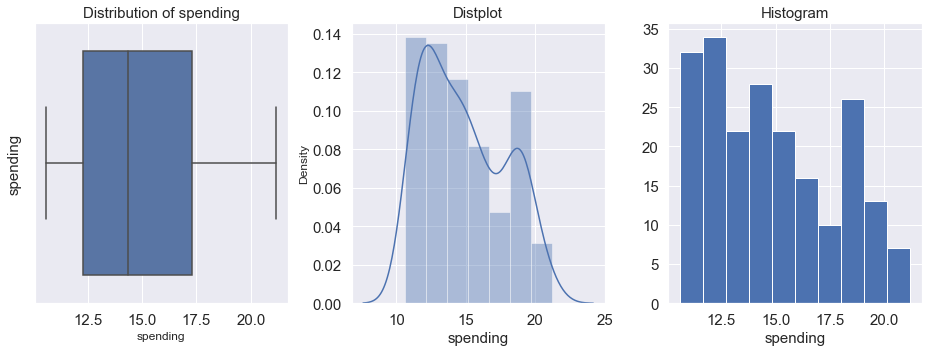

In [292]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=df,orient='V',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2 )
ax2.set_xlabel('spending', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation**
* There is no outlier present.
* Data is mostly right skewed.


**ADVANCE_PAYMENT**

From descriptive summary:
* Minimum advance_payments:  12.41
* Maximum advance_payments:  17.25
* Mean value:  14.559285714285727
* Median value(50%):  14.32
* Standard deviation:  1.305958726564022
* Null values:  Not found

In [293]:
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of advance_payments is ', stats.iqr(df['advance_payments']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

1st Quartile (Q1) is:  13.45
3st Quartile (Q3) is:  15.715
IQR of advance_payments is  2.2650000000000006
Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


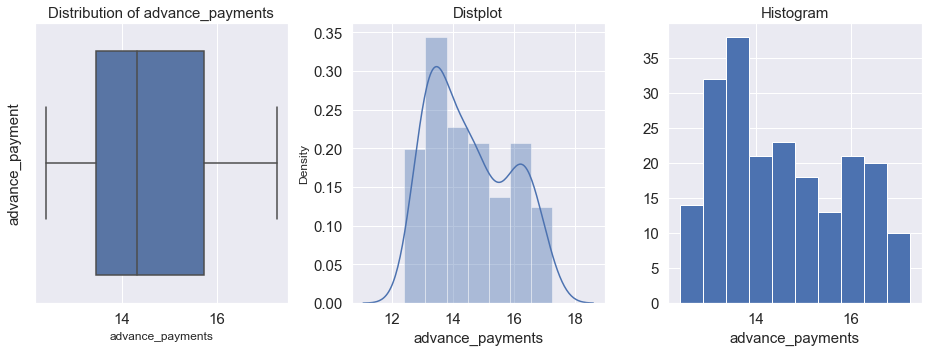

In [294]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='advance_payments',data=df,orient='V',ax=ax1)
ax1.set_ylabel('advance_payment', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2 )
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation**
* There is no outlier present.
* Data is right skewed.


**PROBABILITY_OF_FULL_PAYMENT**

From the descriptive summary:
* Minimum probability_of_full_payment  0.8081
* Maximum probability_of_full_payment:  0.9183
* Mean value:  0.8709985714285714
* Median value(50%):  0.8734500000000001
* Standard deviation:  0.023629416583846496
* Null values:  Not found

In [295]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of probability_of_full_payments is ', stats.iqr(df['probability_of_full_payment']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

1st Quartile (Q1) is:  0.8569
3st Quartile (Q3) is:  0.887775
IQR of probability_of_full_payments is  0.030874999999999986
Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


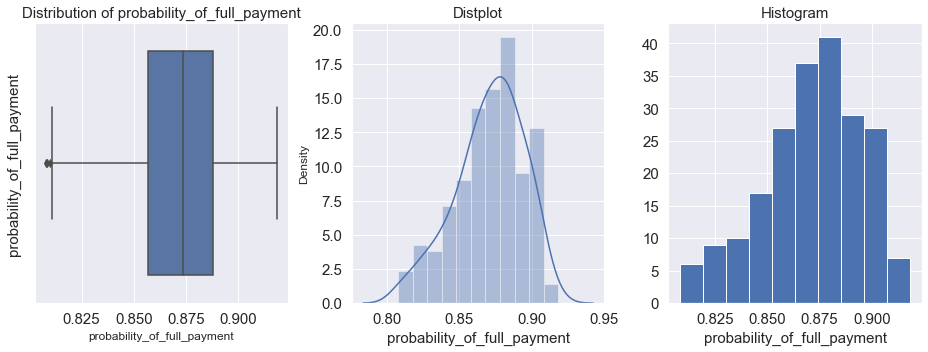

In [296]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,orient='V',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2 )
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [297]:
 #The number of outliers in probability_of_full_payment lower level.

df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()


3

**Observation**
* There are 3 outliers are present in the data.
* Data is left skewed.


**CURRENT BALANCE**

From the descriptive summary:
* Minimum current_balance:  4.899
* Maximum current_balance:  6.675
* Mean value:  5.628533333333334
* Median value(50%):  5.5235
* Standard deviation:  0.4430634777264493
* Null values:  Not found.

In [298]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of current_balance is ', stats.iqr(df['current_balance']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

1st Quartile (Q1) is:  5.26225
3st Quartile (Q3) is:  5.97975
IQR of current_balance is  0.7175000000000002
Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


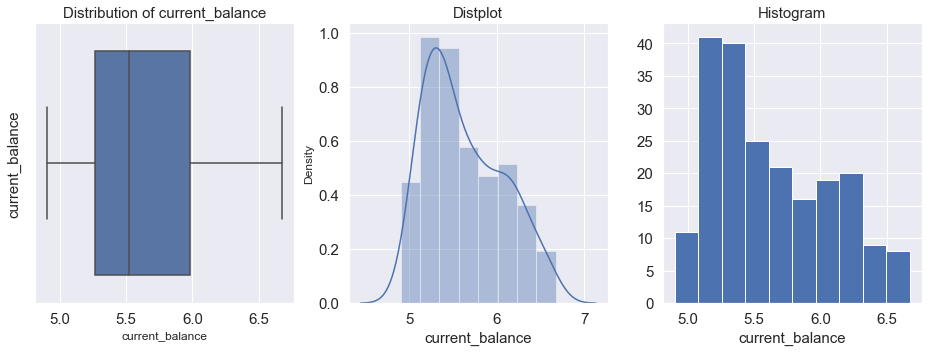

In [299]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=df,orient='V',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['current_balance'],ax=ax2 )
ax2.set_xlabel('current_balance', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation**
* There are no outliers are present in the data.
* Data is almost equally distributed. but right skewed.

**CREDIT LIMIT**

From the descriptive summary:
* Minimum credit_limit:  2.63
* Maximum credit_limit:  4.033
* Mean value:  3.258604761904763
* Median value(50%):  3.237
* Standard deviation:  0.3777144449065874
* Null values:  Not found

In [300]:
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of credit_limit is ', stats.iqr(df['credit_limit']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

1st Quartile (Q1) is:  2.944
3st Quartile (Q3) is:  3.56175
IQR of credit_limit is  0.61775
Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


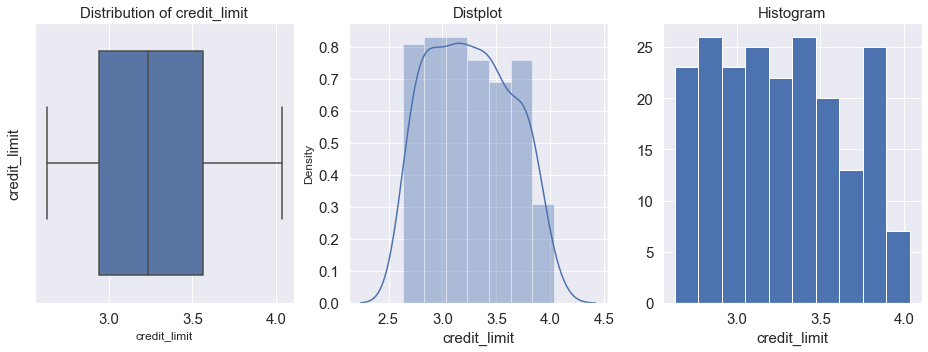

In [301]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df,orient='V',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['credit_limit'],ax=ax2 )
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation**
* There are no outliers are present in the data.
* Data is equally distributed.

**MIN_PAYMENT_AMT**

From the descriptive summary:
* Minimum min_payment_amt:  0.7651
* Maximum min_payment_amt:  8.456
* Mean value:  3.7002009523809507
* Median value(50%):  3.599
* Standard deviation:  1.5035571308217792
* Null values:  Not Found

In [302]:
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of min_payment_amt is ', stats.iqr(df['min_payment_amt']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

1st Quartile (Q1) is:  2.5615
3st Quartile (Q3) is:  4.76875
IQR of min_payment_amt is  2.2072499999999997
Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


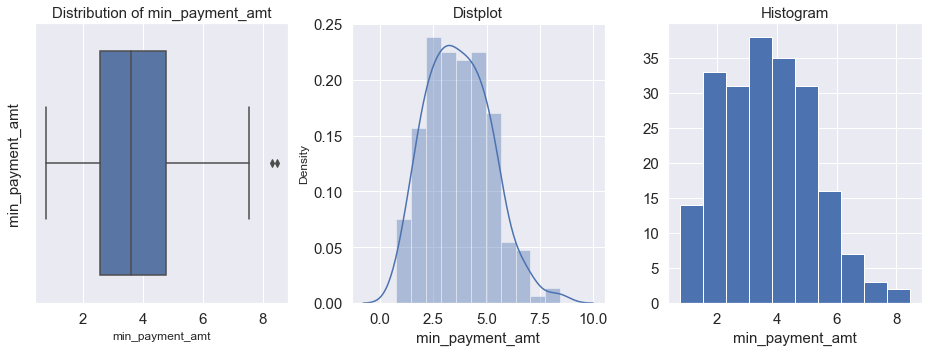

In [303]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,orient='V',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['min_payment_amt'],ax=ax2 )
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [304]:
#Number of outliers in min_payment_amt upper side.

df[df['min_payment_amt']>8.079625]['min_payment_amt'].count()


2

**Observation**
* There are 2 outliers are present in the data.
* Data is right skewed.

**MAX_SPENT_IN_SINGLE_SHOPPING**

From the descriptive summary:
* Minimum max_spent_in_single_shopping:  4.519
* Maximum max_spent_in_single_shoppings:  6.55
* Mean value:  5.408071428571429
* Median value(50%):  5.223000000000001
* Standard deviation:  0.4914804991024054
* Null values:  Not found

In [305]:
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('IQR of max_spent_in_single_shopping is ', stats.iqr(df['max_spent_in_single_shopping']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

1st Quartile (Q1) is:  5.045
3st Quartile (Q3) is:  5.877
IQR of max_spent_in_single_shopping is  0.8319999999999999
Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


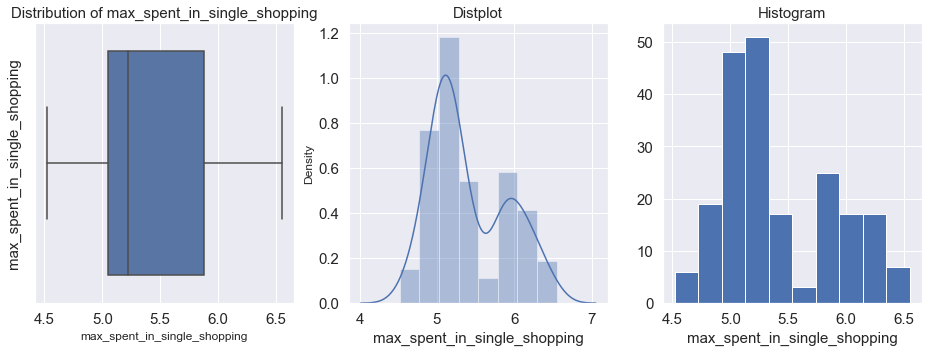

In [306]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,orient='V',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['max_spent_in_single_shopping'],ax=ax2 )
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**Observation**
* There are no outliers are present in the data.
* Data is right skewed.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

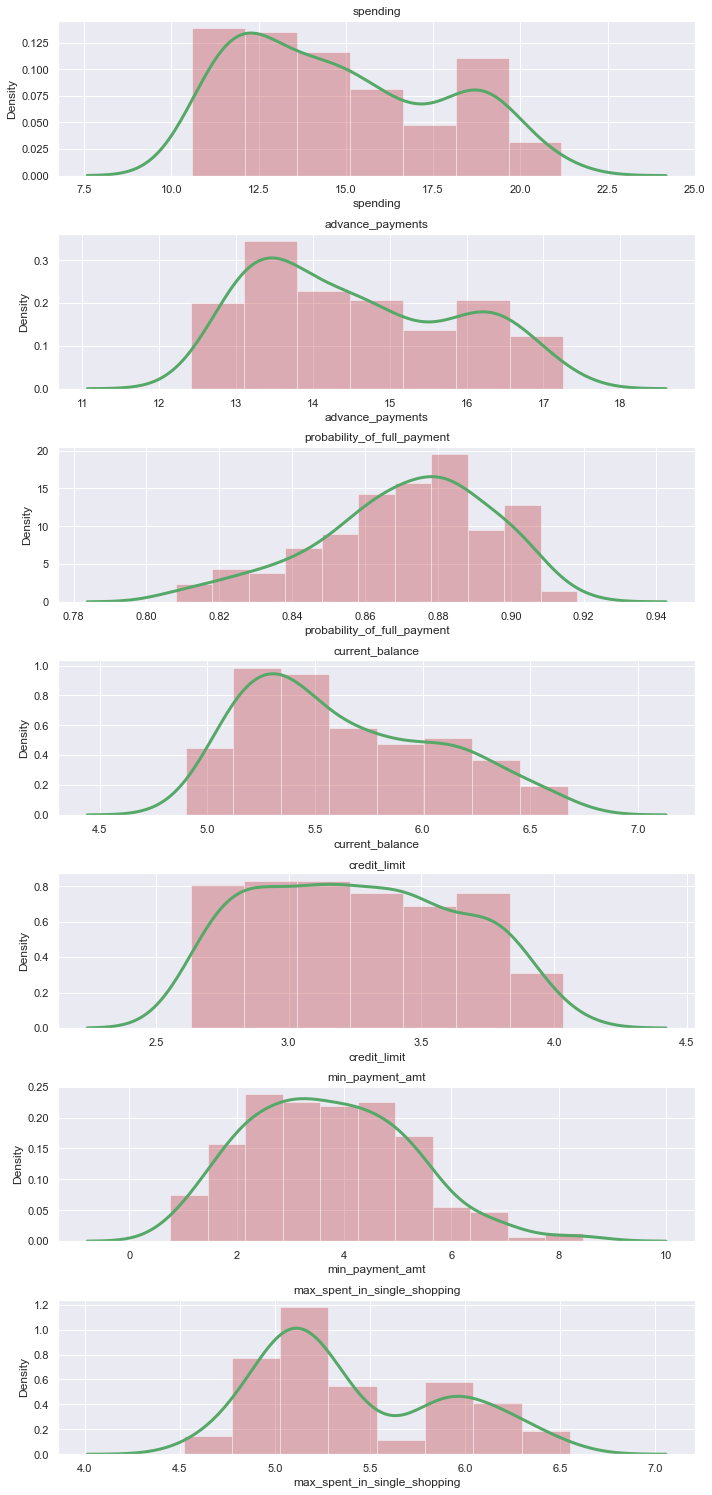

In [307]:
#KDE to represent the skewness and the density of the data.


plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "g", "lw": 3, "label": "KDE"}, hist_kws={"color": "r"})
  plt.title(df.columns[i])

plt.tight_layout()

In [308]:
# The skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

**Observations**
* credit limit has the least skewness(nearer to zero) and it is almost normally distributed. 
* remaining all the variables are right skewed execpt probability_of_full_payment variable, which is left skewed.
* max_spent_in_single_shopping variable with highest skewness with 0.562 which is right skewed.
* The only left skewed variable is probability_of_full_payment with -0.538

# Multivariate Analysis

**Check for multicollinearity:**

In [309]:
#correlation matrix

df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


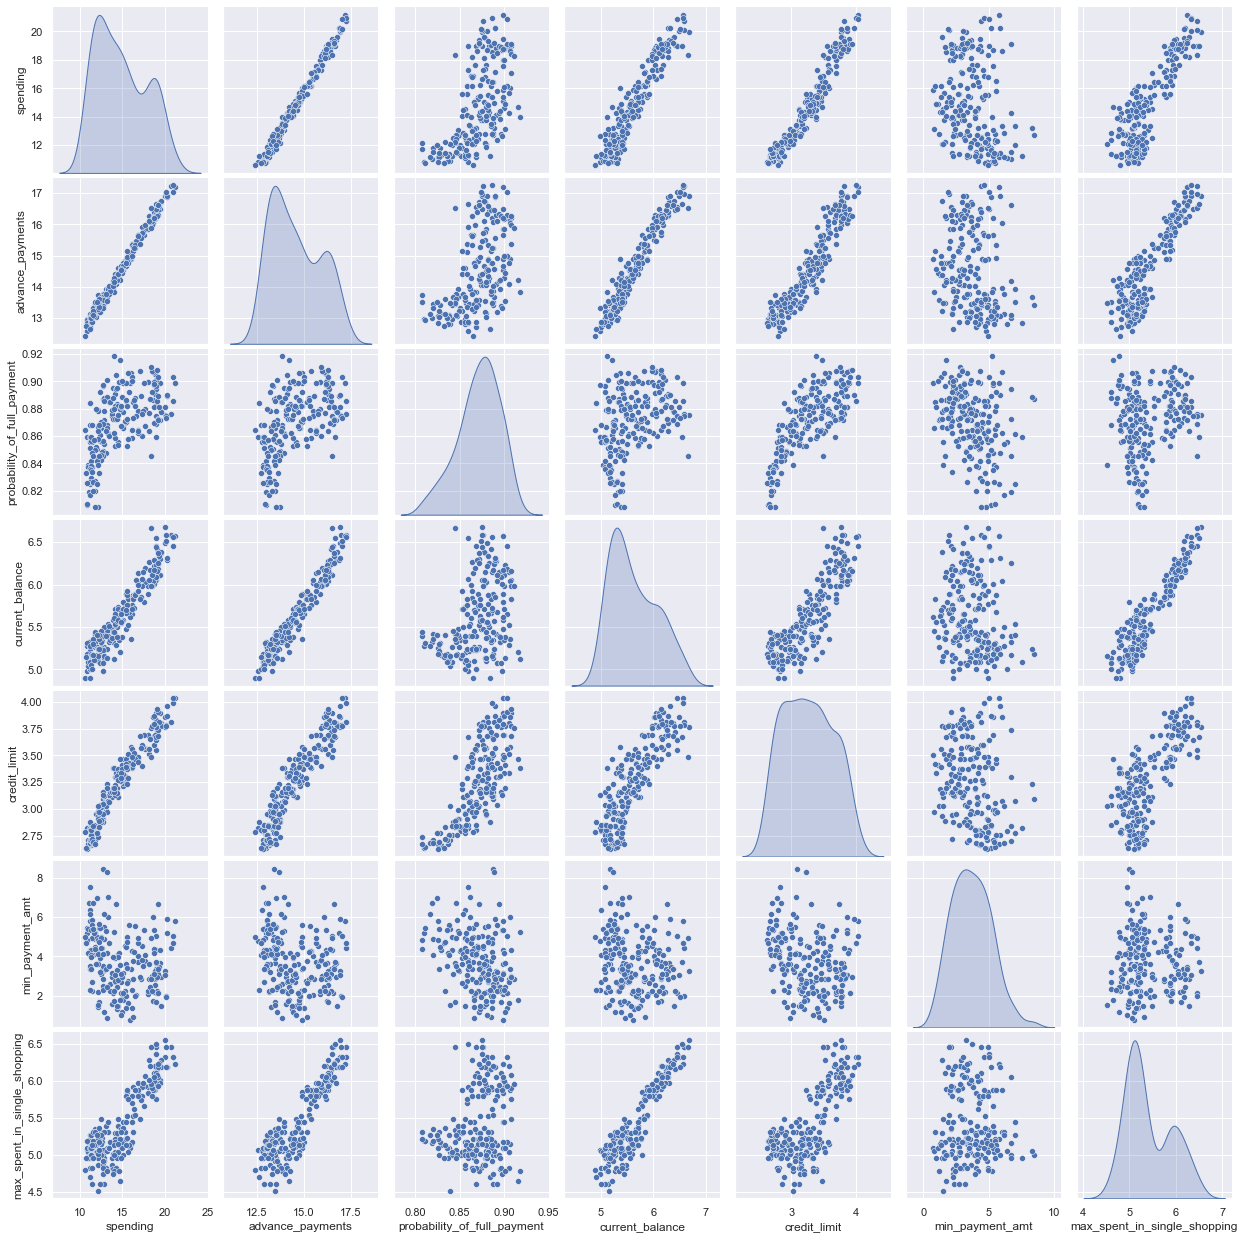

In [310]:
#Visualization of corelation.
sns.pairplot(df,diag_kind='kde');

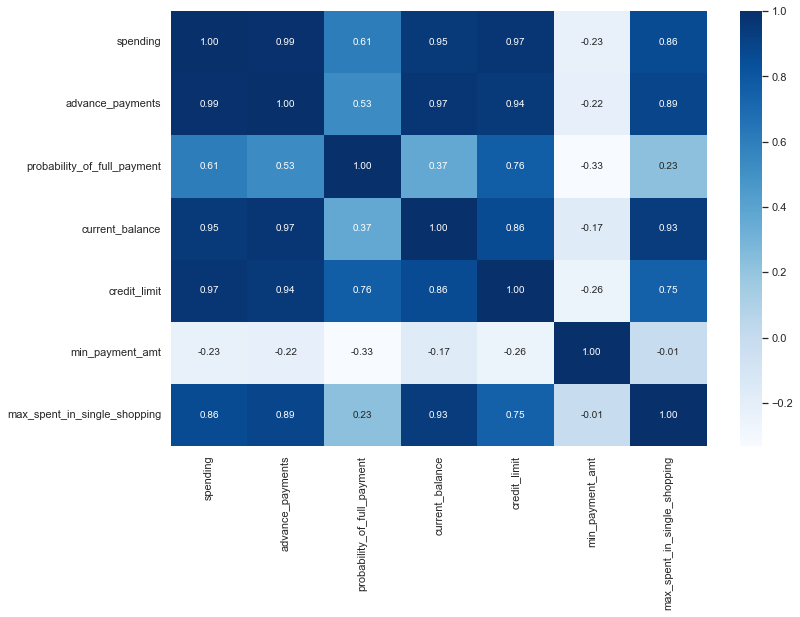

In [311]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues',fmt = '.2f');

###### Observation
* Strong positive correlation between: 
    -spending & advance_payments,
    
    -spending & current_balance,
    
    -spending & credit_limit, 
    
    -advance_payments & current_balance, 
    
    -credit_limit & advance_payments,
    
    -max_spent_in_single_shopping	and current_balance,
    

* The lowest negative corelation is between min_payment_amt and probability_of_full_payment

**We are not treating outliers as there are no extreme outliers are present in the dataset. There are totally 5 outliers are from 2 variables which are not extreme values.** 

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [312]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


* Scaling needs to be done as the values of the variables are different.
* From the above data, spending, advance_payments are slightly in different values and this may get more weightage.
* Scaling can have all the values in the relative same range.
* Here I am using zscore to standardize the data.
* Below i have displayed the plot of the data before and after scaling.


In [313]:
# Scaling the attributes.

from scipy.stats import zscore
df_Scaled=df.apply(zscore)
df_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


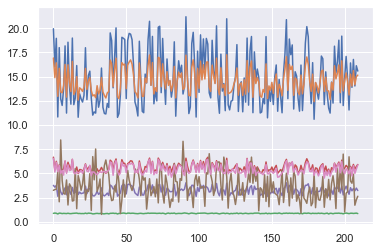

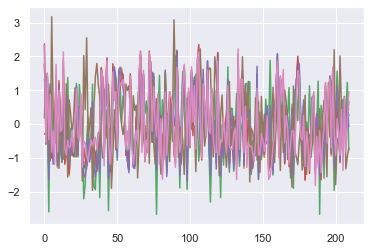

In [314]:
#before scaling
plt.plot(df)
plt.show()

#after scaling
plt.plot(df_Scaled)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [315]:
#Creating Dendogram

#Importing dendrogram and linkage module
from scipy.cluster.hierarchy import dendrogram, linkage

**Choosing ward linkage method**

In [316]:
wardlink = linkage(df_Scaled, method = 'ward')

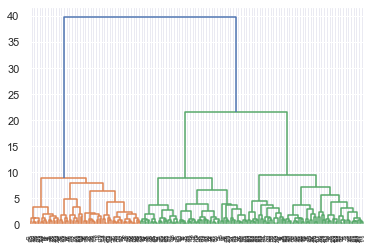

In [317]:
dend = dendrogram(wardlink)

**Cutting the Dendrogram with suitable clusters**

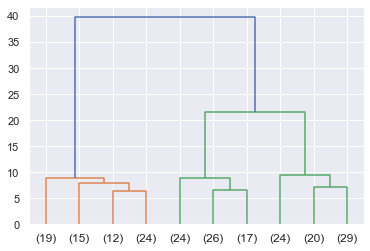

In [318]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10)

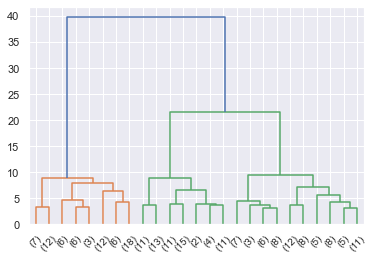

In [319]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 25)

In [320]:
#importing fcluster
from scipy.cluster.hierarchy import fcluster

In [321]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [322]:
cluster3_dataset=df.copy()

In [323]:
cluster3_dataset['clusters-3'] = clusters_3

In [324]:
cluster3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


**Cluster Frequency**

In [325]:
cluster3_dataset['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

**Cluster Profiles**

In [326]:
aggdata_w=cluster3_dataset.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


**Another Method: Average**

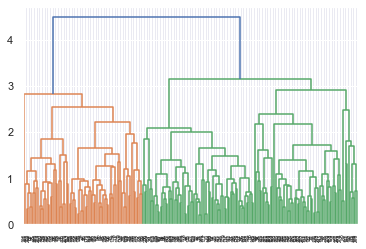

In [327]:
av_method = linkage(df_Scaled, method = 'average')
dend = dendrogram(av_method)

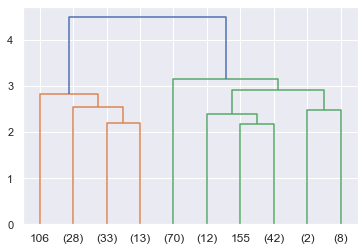

In [328]:
dend = dendrogram(av_method,
                 truncate_mode='lastp',
                 p = 10)

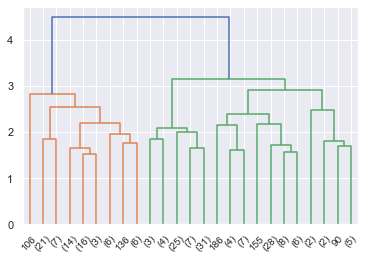

In [329]:
dend = dendrogram(av_method,
                 truncate_mode='lastp',
                 p = 25)

In [330]:
clusters_av_3 = fcluster(av_method, 3, criterion='maxclust')
clusters_av_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [331]:
cluster3_av_dataset=df.copy()

In [332]:
cluster3_av_dataset['clusters-3'] = clusters_av_3

In [333]:
cluster3_av_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [334]:
#Cluster Frequency
cluster3_av_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [335]:
#Cluster Profiles
aggdata_a=cluster3_av_dataset.groupby('clusters-3').mean()
aggdata_a['Freq']=cluster3_av_dataset['clusters-3'].value_counts().sort_index()
aggdata_a


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


**OBSERVATION**
* Both the ward and average are almost similer means , minor variation, which we know it occurs.

* For cluster grouping based on the dendrogram, 3 or 4 looks good. 

* We did the further analysis and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering.

* Also in real time, there colud have been more variables value captured.

* And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [336]:
from sklearn.cluster import KMeans 


#Calculation of WSS(inertia for each value of k)

k_means = KMeans(n_clusters = 1)
k_means.fit(df_Scaled)
k_means.inertia_ 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1469.9999999999995

In [337]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_Scaled)
k_means.inertia_

659.1717544870411

In [338]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_Scaled)
k_means.inertia_

430.65897315130064

In [339]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_Scaled)
k_means.inertia_

371.301721277542

In [340]:
wss =[] 

In [341]:
    for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(df_Scaled)
        wss.append(KM.inertia_)
               

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [342]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.9966912581544,
 289.9403607846759,
 262.26836677650624,
 241.26651953908484,
 221.1313758267267,
 209.3801238037615]

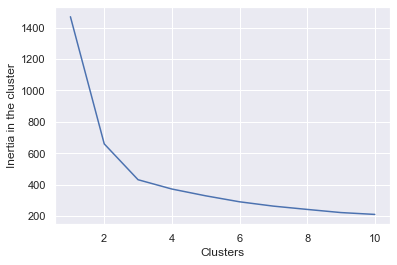

In [343]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

**Elbow Method applied and now visualized with different values of K. Finalizing k=3 as the optimal value as there is no drastical reduction in inertia after k=3.**

In [344]:
k_means_3 = KMeans(n_clusters=3)
k_means_3.fit(df_Scaled)
labels_3 = k_means_3.labels_

In [345]:
kmeans3_dataset=df.copy()

In [346]:
kmeans3_dataset["Clus_kmeans"] = labels_3
kmeans3_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [347]:
#Silhotte score

from sklearn.metrics import silhouette_samples, silhouette_score

In [348]:
silhouette_score(df_Scaled,labels_3)

0.40072705527512986

score is nearer to 0.5 therefore it is almost well distinguished cluster.

In [349]:
from sklearn import metrics

In [350]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_Scaled)
    scores.append(metrics.silhouette_score(df_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282168,
 0.2666366921192433,
 0.2731288488219916]

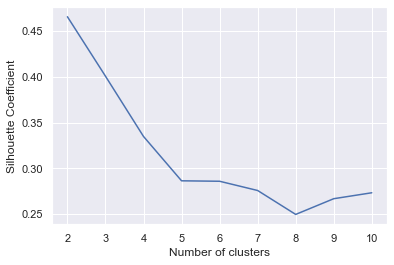

In [351]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**From SC Score, the number of optimal clusters could be 3 or 4**

In [352]:
sil_width3 = silhouette_samples(df_Scaled,labels_3)

In [353]:
kmeans3_dataset["sil_width"] = sil_width3
kmeans3_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [354]:
#To check the proper mapping,
silhouette_samples(df_Scaled,labels_3).min()

0.002713089347678376

The minimum value is not a negative value.

**3 CLUSTER SOLUTION**

In [355]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [356]:
#fitting the Kmeans 
km_3.fit(df_Scaled)
km_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [357]:
#proportion of labels classified

pd.Series(km_3.labels_).value_counts()

2    72
0    71
1    67
dtype: int64

**K-Means Clustering & Cluster Information**

In [358]:
kmeans1_dataset=df.copy()

In [359]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0


In [360]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [361]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [362]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T 

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


**From the above analysis,**

* Based on current dataset given, 3 cluster solution makes sense based on the spending pattern i.e. High, Medium, Low

* We can perform the analysis on k=4 and k=5, but k=3 holding the better spending pattern, I am finalising the k=3 

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

**3 group cluster via Kmeans**

In [363]:
#After performaing the Mean of clusters for K=3 above

cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


In [364]:
#Cluster Profile of 

aggdata_w.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


From the above data, We can group the 3 clusters into 3 profiles.

* Group 1 : High Spending
* Group 2 : Low Spending
* Group 3 : Medium Spending

**Promotional strategies for each cluster**

## Group 1 : High Spending Group
    
 *  We could see, the maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment.
 *  Increase spending habits
 *  Giving any reward points might increase their purchases.
 *  Increase the credit limit to encourage the spending limit.
 *  as they are customers with good repayment record. can be offered with loan against the credit card.
 *  Can be tie up with new popular and unique luxary brands, which might drive more one_time_maximun spending.
    

## Group 2 : Low Spending Group

* Offers can be provided on early payments to improve their payment rate.
* As the full payment history is good, can be increase the credit limit, also lower down interest rate based ontheir purchases. 
* Increase there spending habits by tieing up with convinient brands, providing the reward points for each purchase etc.
    

## Group 3 : Medium Spending Group
    
* They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
* Promote premium cards/loyality rewards to increase transcations.
* Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

# PROBLEM2: CART-RF-ANN

**An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.**

# Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10. Age of insured (Age)

In [365]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [366]:
df1 = pd.read_csv('C:/Users/Dell/Downloads/insurance_part2_data.csv')

In [367]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


From the above data, the variable 'Claimed' can be considered as dependent variable.

In [368]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Observatiom

* There 10 variables
* numeric variable: Age, Commision, Duration and  Sales.
* rest are categorial variables
* Found 3000 records
* No missing records.
* 9 independant variable and one target/Dependent variable 'Clamied'.

In [369]:
# Checking for missing values.
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Found No missing records.

In [370]:
#Descriptive Statistics Summary

df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:  
* Found min value of 'duration' is -1 which is negative. As it is not possible, this is a wrong entry.
* Found total 5 unique insuarance product name for 3 unique destinations.

In [371]:
#To identify the unique values in catagorical variables.

for column in df1[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df1[column].nunique())
    print(df1[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




Above data shows the  unique counts of all Nominal Variables

In [372]:
dups = df1.duplicated()
dups.sum()

139

Found 139 duplicate values.

In [373]:
df1[dups].head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA


**We can notice that the unique customer details like customer ID, email ID or phone number are not provided. So these duplicate data can be of different customers. So I am not going to removing the dupliccate entried in dataframe.**

In [374]:
#data dimensions

df1.shape

(3000, 10)

# Univariate Analysis

<AxesSubplot:>

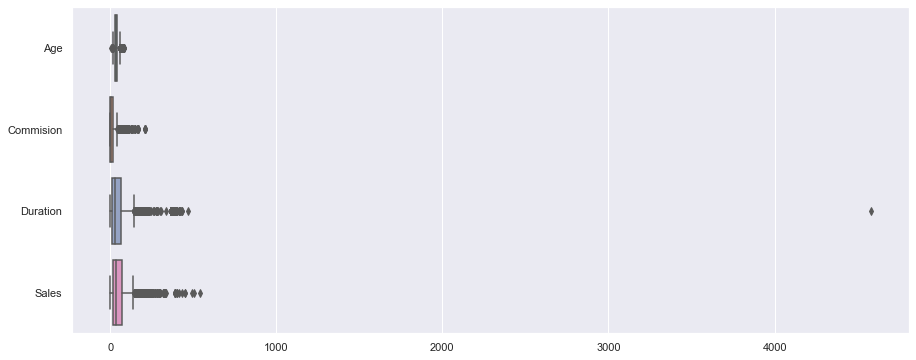

In [375]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df1, orient="h", palette="Set2")

**We could see that all the numeric variables are having outliers in the data.**

**AGE:**

From Descriptive statistical summary:

* Minimum Age:  8
* Maximum Age:  84
* Mean value:  38.091
* Median value(50%):  36.0
* Standard deviation:  10.463518245377944
* Null values:  Not found

In [376]:
#Quartiles

Q1=df1['Age'].quantile(q=0.25)
Q3=df1['Age'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(df1['Age']))

##Outlier detection from Interquartile range (IQR)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

spending - 1st Quartile (Q1) is:  32.0
spending - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0
Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [377]:
print('Number of outliers in Age upper : ', df1[df1['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df1[df1['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',df1[df1['Age']>57.0]['Age'].count()*100/len(df1), '%')
print('% of Outlier in Age lower: ',df1[df1['Age']<17.0]['Age'].count()*100/len(df1), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  6.6 %
% of Outlier in Age lower:  0.2 %


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


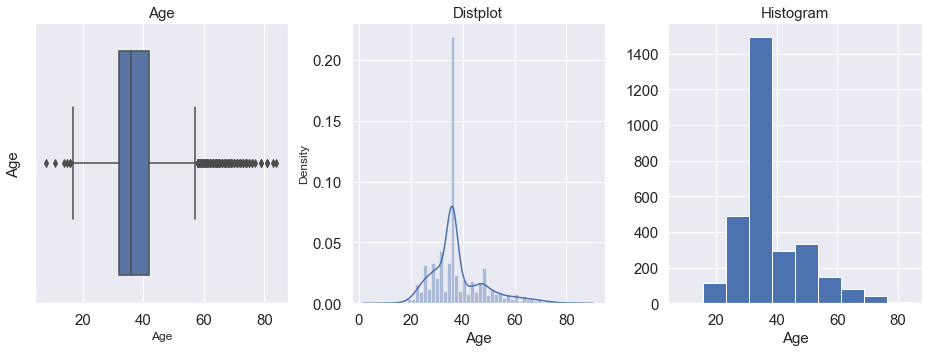

In [378]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Age',data=df1,orient='V',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['Age'],ax=ax2 )
ax2.set_xlabel('Age', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**COMMISSION:**

From descriptive statistical summary:

* Minimum Commision:  0.0
* Maximum Commision:  210.21
* Mean value:  14.529203333333266
* Median value:  4.63
* Standard deviation:  25.48145450662553
* Null values:  Not found

In [379]:
Q1=df1['Commision'].quantile(q=0.25)
Q3=df1['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(df1['Commision']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235
Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [380]:
print('Number of outliers in Commision upper : ', df1[df1['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df1[df1['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',df1[df1['Commision']>43.0875]['Commision'].count()*100/len(df1), '%')
print('% of Outlier in Commision lower: ',df1[df1['Commision']<-25.8525]['Commision'].count()*100/len(df1), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12.066666666666666 %
% of Outlier in Commision lower:  0.0 %


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


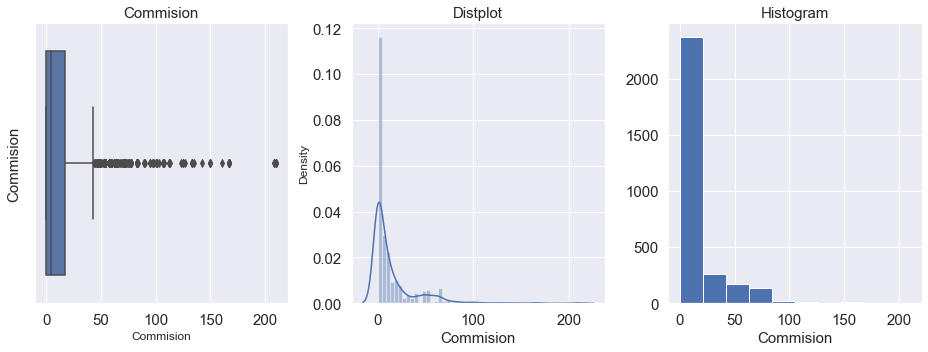

In [381]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Commision',data=df1,orient='V',ax=ax1)
ax1.set_ylabel('Commision', fontsize=15)
ax1.set_title('Commision', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['Commision'],ax=ax2 )
ax2.set_xlabel('Commision', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**DURATION**

From the descriptve statistical summary:
    
* Minimum Duration:  -1
* Maximum Duration:  4580
* Mean value:  70.00133333333333
* Median value:  26.5
* Standard deviation:  134.05331313253495
* Null values:  Not found

In [382]:
Q1=df1['Duration'].quantile(q=0.25)
Q3=df1['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(df1['Duration']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0
Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [383]:
print('Number of outliers in Duration upper : ', df1[df1['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df1[df1['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',df1[df1['Duration']>141.0]['Duration'].count()*100/len(df1), '%')
print('% of Outlier in Duration lower: ',df1[df1['Duration']<-67.0]['Duration'].count()*100/len(df1), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  12.733333333333333 %
% of Outlier in Duration lower:  0.0 %


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


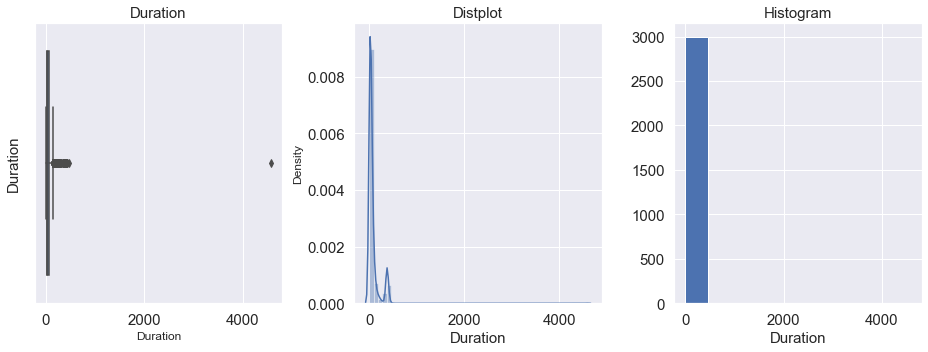

In [384]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Duration',data=df1,orient='V',ax=ax1)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['Duration'],ax=ax2 )
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

**SALES:**

From descriptive statistical summary:
    
* Minimum Sales:  0.0
* Maximum Sales:  539.0
* Mean value:  60.24991333333344
* Median value:  33.0
* Standard deviation:  70.73395353143047
* Null values:  Not found    

In [385]:
Q1=df1['Sales'].quantile(q=0.25)
Q3=df1['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(df1['Sales']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0
Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [386]:
print('Number of outliers in Sales upper : ', df1[df1['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', df1[df1['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(df1[df1['Sales']>142.5]['Sales'].count()*100/len(df1)), '%')
print('% of Outlier in Sales lower: ',round(df1[df1['Sales']<-53.5]['Sales'].count()*100/len(df1)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


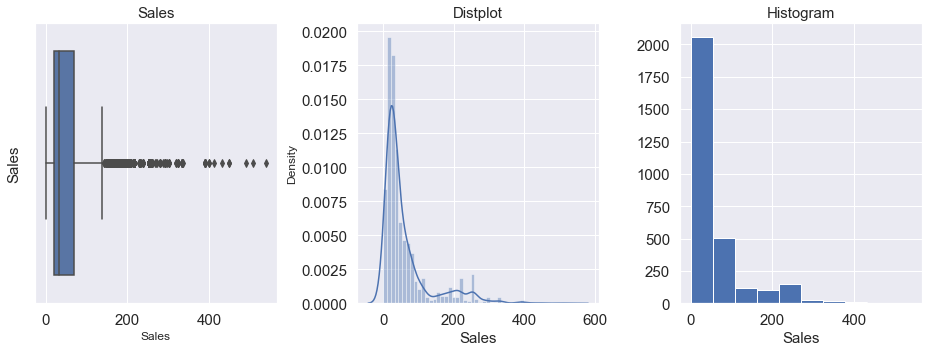

In [387]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Sales',data=df1,orient='V',ax=ax1)
ax1.set_ylabel('Sales', fontsize=15)
ax1.set_title('Sales', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['Sales'],ax=ax2 )
ax2.set_xlabel('Sales', fontsize=15)
ax2.set_title('Distplot', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.set_title('Histogram', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [388]:
df1.skew().sort_values(ascending=False)

C:\Users\Dell\AppData\Local\Temp/ipykernel_7536/776276037.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew().sort_values(ascending=False)


Duration     13.784681
Commision     3.148858
Sales         2.381148
Age           1.149713
dtype: float64

**OBSERVATION:**
  * There are outliers in all the variables, but the sales and commision can be a geneuine business values. 
  * Random Forest and CART can handle the outliers. Hence, Outliers are not treated and we will keep the data as it is. 
  * We are treating the outliers for the ANN model to compare the same after the all the steps just for comparsion.
  * All the data are right skewed.

# Categorical Variables

**AGENCY CODE:**

**Count Plot**

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

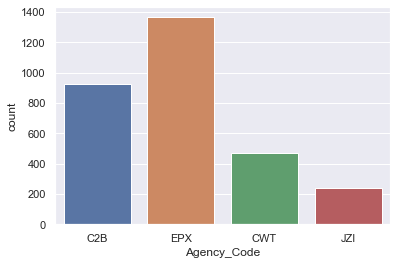

In [389]:
sns.countplot(data = df1, x = 'Agency_Code')

**Box plot**

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

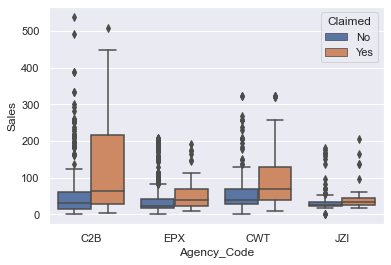

In [390]:
sns.boxplot(data = df1, x='Agency_Code',y='Sales', hue='Claimed')

**TYPE:**

<AxesSubplot:xlabel='Type', ylabel='count'>

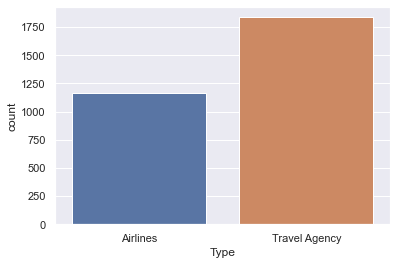

In [391]:
sns.countplot(data = df1, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

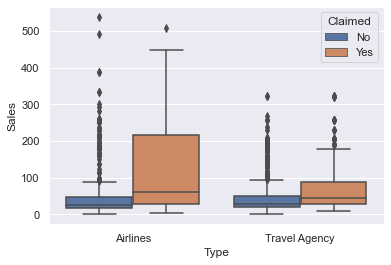

In [392]:
sns.boxplot(data = df1, x='Type',y='Sales', hue='Claimed')

**CHANNEL:**

<AxesSubplot:xlabel='Channel', ylabel='count'>

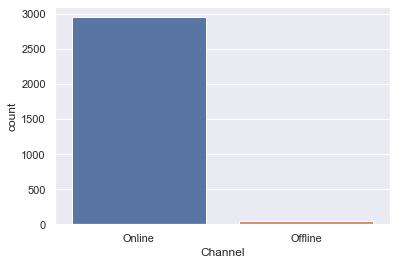

In [393]:
sns.countplot(data = df1, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

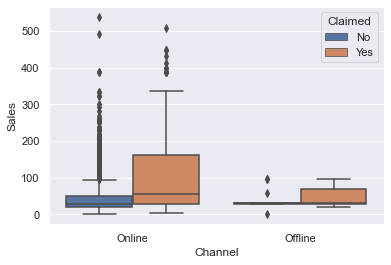

In [394]:
sns.boxplot(data = df1, x='Channel',y='Sales', hue='Claimed')

**PRODUCT NAME:**

<AxesSubplot:xlabel='Product Name', ylabel='count'>

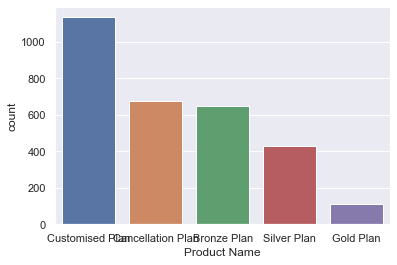

In [395]:
sns.countplot(data = df1, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

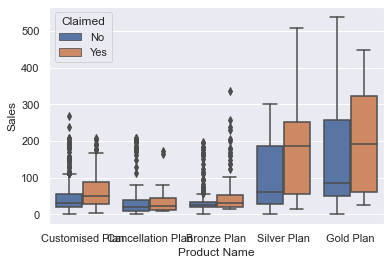

In [396]:
sns.boxplot(data = df1, x='Product Name',y='Sales', hue='Claimed')

**DESTINATION:**

<AxesSubplot:xlabel='Destination', ylabel='count'>

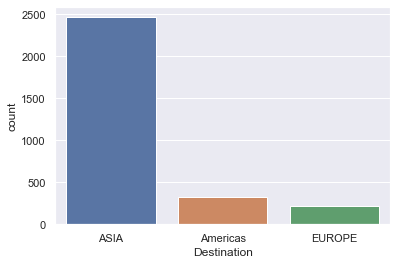

In [397]:
sns.countplot(data = df1, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

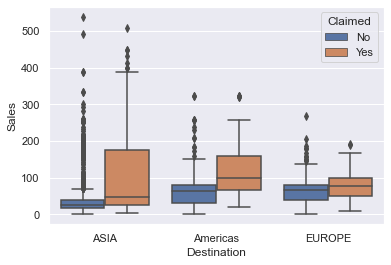

In [398]:
sns.boxplot(data = df1, x='Destination',y='Sales', hue='Claimed')

**Observations:**
* We plotted all the catagorical variables against Sales and Claimed. We found that all the catagorical varibales having outliers mostly on upper level.
* We analysed the countplot of all the catagorical variables.

# Checking pairwise distribution of the continuous variables

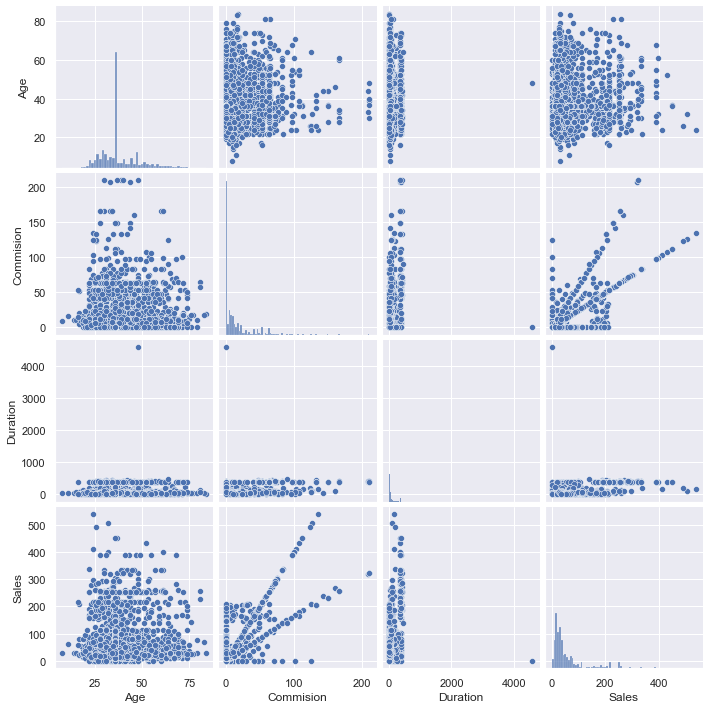

In [399]:
sns.pairplot(df1[['Age', 'Commision', 
    'Duration', 'Sales']])

# Checking for Correlations

In [400]:
#correlation matrix

df1.corr().T

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


<AxesSubplot:>

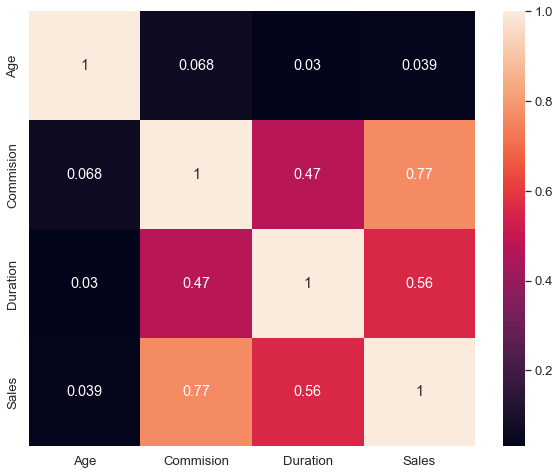

In [401]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df1.corr(), annot=True)

**OBSERVATION:**
* Found comparativly good positive correlation between Commission and Sales.
* There is no negative correlation between any variables.

# Converting all objects to categorical codes

In [402]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        df1[feature] = pd.Categorical(df1[feature]).codes

In [403]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [404]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


<AxesSubplot:>

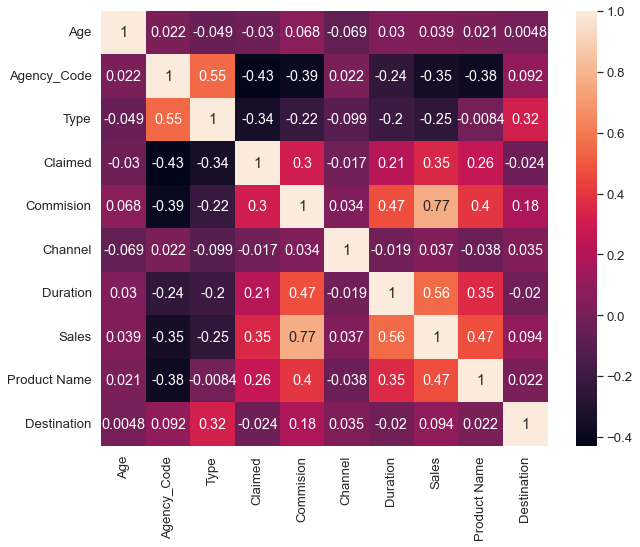

In [405]:
#Corelation after converting all the variable to catagorical variables.
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df1.corr(), annot=True)

OBSERVATION:
* There is no new significant correlation variables pairs.

In [406]:
#Proportion of 1s and 0s of claimed varaiable.

df1.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

**Observation:**
* 69.2 % of the insuarance are not claimed.
* Only 30.8% of insuarances are claimed.

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [407]:
X = df1.drop("Claimed", axis=1)

y = df1.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [408]:
# Scaling the attributes.

from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [409]:
#Splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [410]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtree = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtree, param_grid = param_grid_dtcl, cv = 10)

In [411]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [412]:
#Further we checking for finest values

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtree = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtree, param_grid = param_grid_dtcl, cv = 10)

In [413]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [414]:
#Further we checking for finest values

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [100,150,200,250,300,450,],
}

dtree = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtree, param_grid = param_grid_dtcl, cv = 10)

In [415]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [416]:
#Further we checking for finest values

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90],
    'min_samples_leaf': [ 44,46,], 
    'min_samples_split': [ 230, 240, 250, 260, 270],
}

dtree = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtree, param_grid = param_grid_dtcl, cv = 10)

In [417]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 44, 'min_samples_split': 260}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=44,
                       min_samples_split=260, random_state=1)

**After multiple pruning process, We are finalizing max_depth= 4.85, min_samples_leaf= 44, min_samples_split= 260 to generate our decision tree** 

**Generating the Tree:**

In [418]:
train_char_label = ['no', 'yes']
tree_regularized = open('C:/Users/Dell/Downloads/tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()

In [419]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.634112
Sales         0.220899
Product Name  0.086632
Commision     0.021881
Age           0.019940
Duration      0.016536
Type          0.000000
Channel       0.000000
Destination   0.000000


**Predicting on Training and Test dataset:**

In [420]:

ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

**Getting the Predicted Classes and Probs**

In [421]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.697947,0.302053
1,0.979452,0.020548
2,0.921171,0.078829
3,0.510417,0.489583
4,0.921171,0.078829


# Building a Random Forest Classifier

In [422]:
param_grid_rfcl = {
    'max_depth': [5,6],
    'max_features': [3,4],
    'min_samples_leaf': [8,9],
    'min_samples_split': [40,46,50], 
    'n_estimators': [350] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [423]:
#After multiple trial and error method we are finalizing above data.
grid_search_rfcl.fit(X_train, train_labels)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [3, 4],
                         'min_samples_leaf': [8, 9],
                         'min_samples_split': [40, 46, 50],
                         'n_estimators': [350]})

In [424]:
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

**We are finalising the best grip random forest classifier**

**Predicting the Training and Testing data:**

In [425]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

**Getting the predicted class and probe**

In [426]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.778010,0.221990
1,0.971910,0.028090
2,0.904401,0.095599
3,0.651398,0.348602
4,0.868406,0.131594


**Variable Importance via RF:**

In [427]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.276015
Product Name  0.235583
Sales         0.152733
Commision     0.135997
Duration      0.077475
Type          0.071019
Age           0.039503
Destination   0.008971
Channel       0.002705


# Building a Neural Network Classifier

In [428]:
param_grid_nncl = {
    'hidden_layer_sizes': [100,200],
    'max_iter': [2000,2500,3000],
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [429]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2000, random_state=1, tol=0.01)

In [430]:
#Predicting the Training and Testing data
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [431]:
#Getting the predicted class and probe.

ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

**CART - AUC and ROC for the training data**

AUC: 0.823


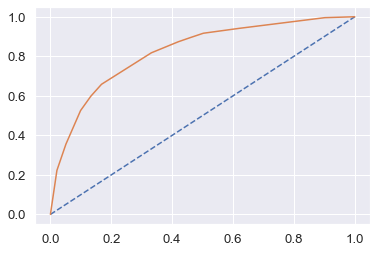

In [432]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)


# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]


# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)


# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')


# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

**CART -AUC and ROC for the test data:**

AUC: 0.801


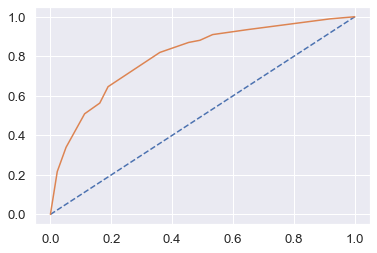

In [433]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)


# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]

# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

**CART Confusion Matrix and Classification Report for the training data:**

In [434]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1309,  144],
       [ 307,  340]], dtype=int64)

In [435]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7852380952380953

In [436]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1453
           1       0.70      0.53      0.60       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



**Observation:** 
* cart train precision  0.7
* cart train recall  0.53
* cart train f1  0.6
* cart train Accuracy ~79%

**CART Confusion Matrix and Classification Report for the testing data:**

In [437]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[553,  70],
       [136, 141]], dtype=int64)

In [438]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7711111111111111

In [439]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.51      0.58       277

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



**Observation:** 
* cart train precision:  0.67
* cart train recall:  0.51
* cart train f1:  0.58
* cart train Accuracy: ~77%

# CART Conclusion

### Train Data:
* cart train Accuracy ~79%
* cart train precision  0.7
* cart train recall  0.53
* cart train f1  0.6


### Test Data:
* cart train Accuracy: ~77%
* cart train precision:  0.67
* cart train recall:  0.51
* cart train f1:  0.58


*** Training and Test set results are almost similar, and with the overall measures high, the model is a good model.**

*** Agency_Code, Sales, Product Name and Commision   are the most important variables for predicting the dependable varaible 'Claimed'.** 

# Random Forest Model Performance Evaluation on Training data

Area under Curve is 0.8563713512840778


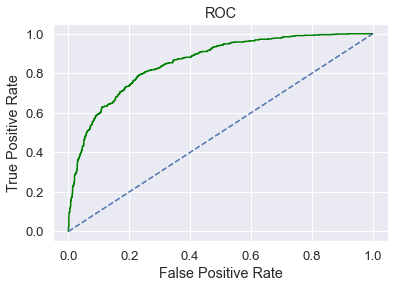

In [440]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

**RF Confusion Matrix and Classification Report for the training data:**

In [441]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1297,  156],
       [ 255,  392]], dtype=int64)

In [442]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8042857142857143

In [443]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



# Random Forest Model Performance Evaluation on Test data

Area under Curve is 0.8181994657271499


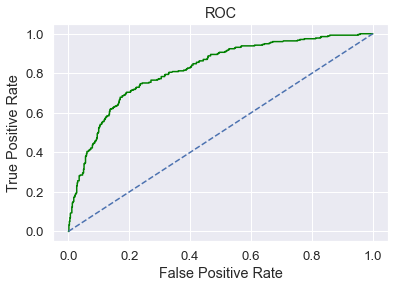

In [444]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [445]:
#confusion matrix

confusion_matrix(test_labels,ytest_predict_rfcl)

array([[550,  73],
       [121, 156]], dtype=int64)

In [446]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7844444444444445

In [447]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.78      0.78       900



# Random Forest Conclusion

### Train Data:
* RF train Accuracy ~80%
* RF train precision  0.72
* RF train recall  0.61
* RF train f1  0.66


### Test Data:
* RF train Accuracy: ~78%
* RF train precision:  0.68
* RF train recall:  0.56
* RF train f1:  0.62


*** Training and Test set results are almost similar and with the overall measures high, the model is a good model.**

*** Agency_Code, Product Name, Sales and Commision   are the most important variables for predicting the dependable varaible 'Claimed'.** 

# Neural Network Model Performance Evaluation on Training data

Area under Curve is 0.8166831721609928


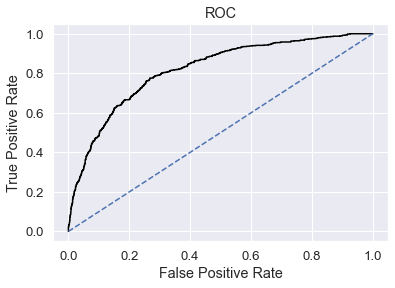

In [448]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [449]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

In [450]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [451]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



# Neural Network Model Performance Evaluation on Test data

Area under Curve is 0.8044225275393896


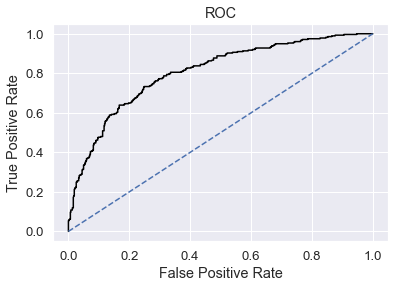

In [452]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [453]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

In [454]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [455]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



# Artificial Neural Network Conclusion

### Train Data:
* NN train Accuracy ~78%
* NN train precision  0.68
* NN train recall  0.51
* NN train f1  0.59


### Test Data:
* NN train Accuracy: ~77%
* NN train precision:  0.67
* NN train recall:  0.50
* NN train f1:  0.57


*** Training and Test set results are almost similar and with the overall measures high, the model is a good model.**


# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [456]:
cart_metrics1=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
dfc1=pd.DataFrame(cart_metrics1).transpose()
cart_train_f1=round(dfc.loc["1"][2],2)
cart_train_recall=round(dfc.loc["1"][1],2)
cart_train_precision=round(dfc.loc["1"][0],2)

cart_metrics2=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
dfc2=pd.DataFrame(cart_metrics2).transpose()
cart_test_precision=round(dfc2.loc["1"][0],2)
cart_test_recall=round(dfc2.loc["1"][1],2)
cart_test_f1=round(dfc2.loc["1"][2],2)

rf_metrics1=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
dfr1=pd.DataFrame(rf_metrics1).transpose()
rf_train_precision=round(dfr1.loc["1"][0],2)
rf_train_recall=round(dfr1.loc["1"][1],2)
rf_train_f1=round(dfr1.loc["1"][2],2)

rf_metrics2=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
dfr2=pd.DataFrame(rf_metrics2).transpose()
rf_test_precision=round(dfr2.loc["1"][0],2)
rf_test_recall=round(dfr2.loc["1"][1],2)
rf_test_f1=round(dfr2.loc["1"][2],2)

nn_metrics1=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
dfn1=pd.DataFrame(nn_metrics1).transpose()
nn_train_precision=round(dfn1.loc["1"][0],2)
nn_train_recall=round(dfn1.loc["1"][1],2)
nn_train_f1=round(dfn1.loc["1"][2],2)

nn_metrics2=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
dfn2=pd.DataFrame(nn_metrics2).transpose()
nn_test_precision=round(dfn2.loc["1"][0],2)
nn_test_recall=round(dfn2.loc["1"][1],2)
nn_test_f1=round(dfn2.loc["1"][2],2)

In [457]:
#Comparing the 
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)

round(data,3)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.785,0.771,0.804,0.784,0.776,0.769
AUC,0.823,0.801,0.856,0.818,0.817,0.804
Recall,0.530,0.510,0.610,0.560,0.510,0.500
Precision,0.700,0.670,0.720,0.680,0.680,0.670
F1 Score,0.600,0.580,0.660,0.620,0.590,0.570


# ROC Curve for the 3 models on the Training data:

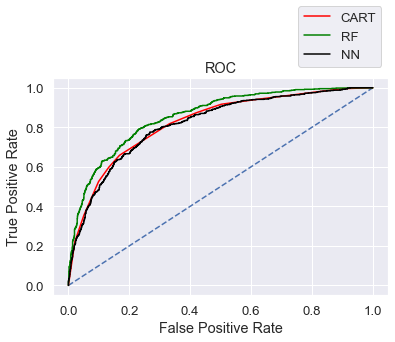

In [458]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data

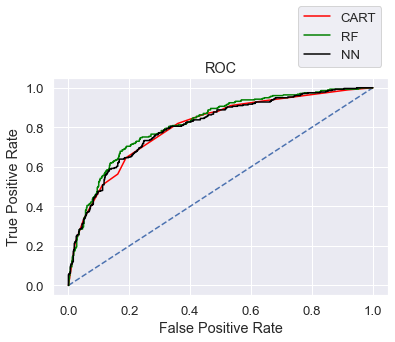

In [459]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

**OBSERVATION:**
* The steaper the ROC curve, stronger the model. If we compare the ROC curves of all three models, Random Forest model ROC curve more steaper than other two models.
* Also it has better accuracy, precsion, recall, f1 score better than other two CART & ANN.
* Therefore I am selecting RF model over CART and ANN.

# 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

Basis on the analysis of Insuarance dataset, predictions by different models, below are the insights.

* I strongly recommended we collect more real time unstructured data and past data if possible. 


* This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.



* Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits.
* As per the data 90% of insurance is done by online channel.
* Other interesting fact, is almost all the offline business has a  claimed associated, need to find why?
* Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency
* Also based on the model we are getting 80%accuracy, so we need customer books airline   tickets or plans, cross sell  the insurance based on the claim data pattern.
* Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?
 
**Key performance indicators (KPI)**

**The KPI’s of insurance claims are:**
* Reduce claims cycle time
* Increase customer satisfaction
* Combat fraud
* Optimize claims recovery
* Reduce claim handling costs

Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.
